In [34]:
import pandas as pd
import itertools
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm.auto import tqdm

In [35]:
data = pd.read_parquet('../data_preprocessed.parquet')
data['FLIGHT_ID'] = data['AIRLINE'] + data['FLIGHT_NUMBER'].astype(str)
data['Date_time'] = pd.to_datetime(data['Date'])

In [ ]:
flights = data.loc[data['FLIGHT_ID'] == 'AS64']#WN3771
flights.head(14)

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DESTINATION_AIRPORT_IATA,Date,SD,DT,WF,WN,SA,AT,FLIGHT_ID,Date_time
4716,4716,2015,1,1,4,AS,64,N799AS,ANC,JNU,...,JNU,2015-01-01,2015-01-01 11:30:00,2015-01-01 11:26:00,2015-01-01 11:43:00,2015-01-01 13:06:00,2015-01-01 13:10:00,2015-01-01 13:12:00,AS64,2015-01-01
7020,7020,2015,1,1,4,AS,64,N799AS,JNU,PSG,...,PSG,2015-01-01,2015-01-01 13:55:00,2015-01-01 13:52:00,2015-01-01 14:06:00,2015-01-01 14:34:00,2015-01-01 14:42:00,2015-01-01 14:39:00,AS64,2015-01-01
8374,8374,2015,1,1,4,AS,64,N799AS,PSG,WRG,...,WRG,2015-01-01,2015-01-01 15:24:00,2015-01-01 15:12:00,2015-01-01 15:16:00,2015-01-01 15:30:00,2015-01-01 15:47:00,2015-01-01 15:35:00,AS64,2015-01-01
9454,9454,2015,1,1,4,AS,64,N799AS,WRG,KTN,...,KTN,2015-01-01,2015-01-01 16:30:00,2015-01-01 16:13:00,2015-01-01 16:17:00,2015-01-01 16:57:00,2015-01-01 17:02:00,2015-01-01 17:02:00,AS64,2015-01-01
10553,10553,2015,1,1,4,AS,64,N799AS,KTN,SEA,...,SEA,2015-01-01,2015-01-01 17:43:00,2015-01-01 17:35:00,2015-01-01 17:41:00,2015-01-01 20:11:00,2015-01-01 20:25:00,2015-01-01 20:16:00,AS64,2015-01-01
20329,20329,2015,1,2,5,AS,64,N762AS,ANC,JNU,...,JNU,2015-01-02,2015-01-02 11:30:00,2015-01-02 11:17:00,2015-01-02 11:29:00,2015-01-02 12:47:00,2015-01-02 13:10:00,2015-01-02 12:50:00,AS64,2015-01-02
22776,22776,2015,1,2,5,AS,64,N762AS,JNU,PSG,...,PSG,2015-01-02,2015-01-02 13:55:00,2015-01-02 13:57:00,2015-01-02 14:18:00,2015-01-02 14:56:00,2015-01-02 14:42:00,2015-01-02 14:58:00,AS64,2015-01-02
24253,24253,2015,1,2,5,AS,64,N762AS,PSG,WRG,...,WRG,2015-01-02,2015-01-02 15:24:00,2015-01-02 15:38:00,2015-01-02 15:47:00,2015-01-02 16:00:00,2015-01-02 15:47:00,2015-01-02 16:05:00,AS64,2015-01-02
25372,25372,2015,1,2,5,AS,64,N762AS,WRG,KTN,...,KTN,2015-01-02,2015-01-02 16:30:00,2015-01-02 16:32:00,2015-01-02 16:44:00,2015-01-02 17:12:00,2015-01-02 17:02:00,2015-01-02 17:17:00,AS64,2015-01-02
26613,26613,2015,1,2,5,AS,64,N762AS,KTN,SEA,...,SEA,2015-01-02,2015-01-02 17:43:00,2015-01-02 17:48:00,2015-01-02 18:00:00,2015-01-02 20:23:00,2015-01-02 20:25:00,2015-01-02 20:29:00,AS64,2015-01-02


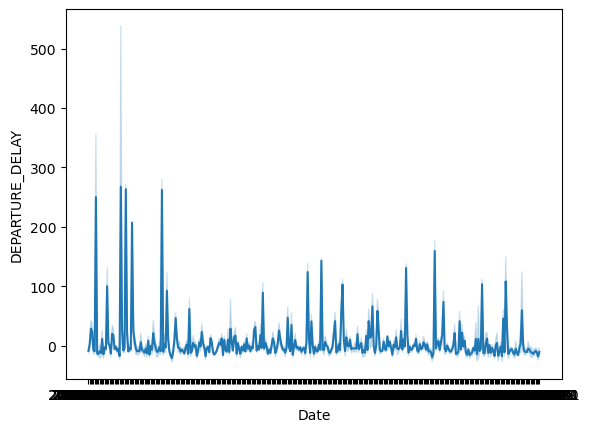

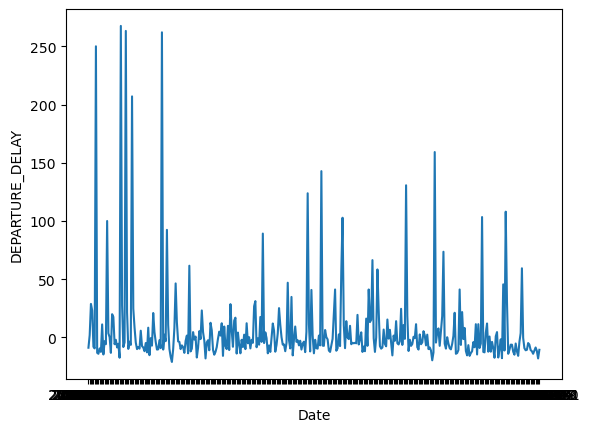

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.lineplot(data=flights,x='Date',y='DEPARTURE_DELAY')
plt.show()

sns.lineplot(data=flights.groupby('Date').agg({'DEPARTURE_DELAY':'mean'}).reset_index(),x='Date',y='DEPARTURE_DELAY')
plt.show()

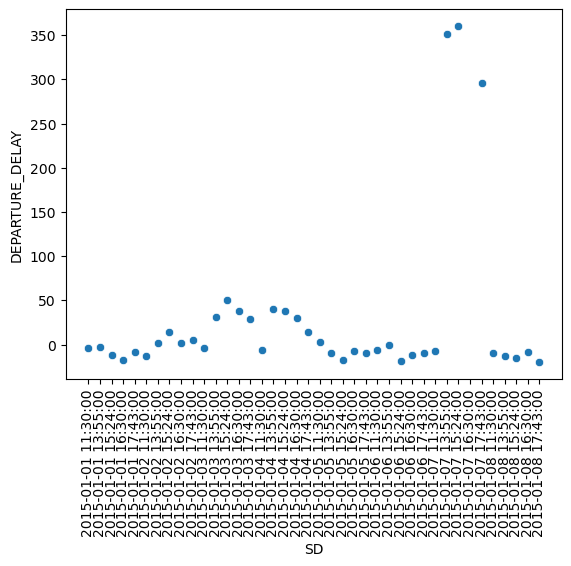

In [ ]:
sns.scatterplot(data=flights.iloc[:40,:],x='SD',y='DEPARTURE_DELAY')
plt.xticks(rotation=90)
plt.show()

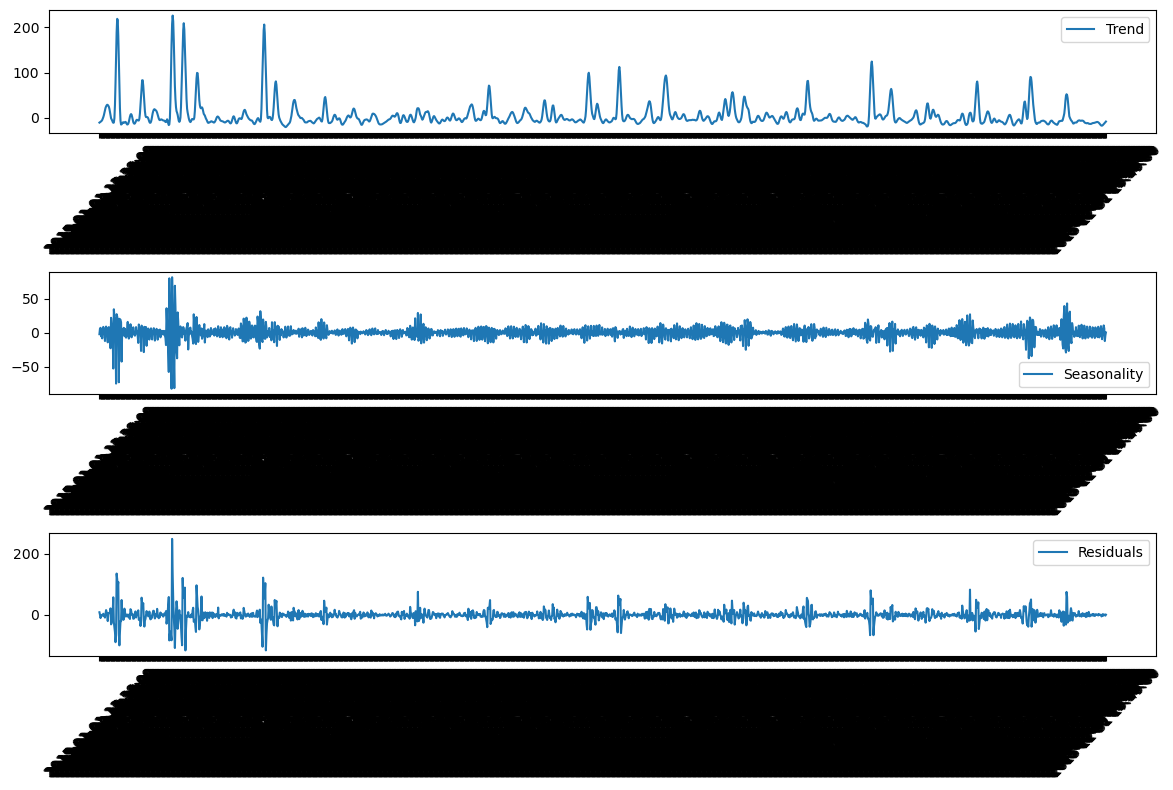

In [ ]:
from statsmodels.tsa.seasonal import STL
stl = STL(flights['DEPARTURE_DELAY'].interpolate(method='linear'), period=5)
res = stl.fit()

season = res.seasonal
trend = res.trend
resid = res.resid

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
#plt.plot(flights.index, flights['DEPARTURE_DELAY'], label='Original')
plt.plot(flights['SD'], trend, label='Trend')
plt.xticks(rotation=45)
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(flights['SD'], season, label='Seasonality')
plt.xticks(rotation=45)
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(flights['SD'], resid, label='Residuals')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y = flights.iloc[:int(np.floor(flights.shape[0]*0.8)),:].loc[:,['DEPARTURE_DELAY','SD']].set_index('SD').interpolate(method='linear')
y_test = flights.iloc[int(np.floor(flights.shape[0]*0.8)):,:].loc[:,['DEPARTURE_DELAY','SD']].set_index('SD').interpolate(method='linear')

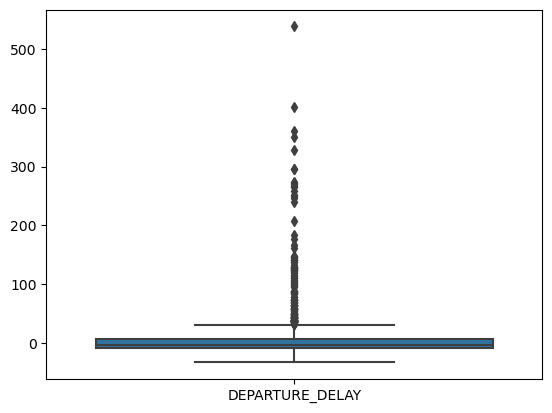

In [ ]:
sns.boxplot(y)
plt.show()
Q3 = y.quantile(0.75)
Q1 = y.quantile(0.25)
IQR = Q3-Q1
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

y[(y > upper_bound).values | (y<lower_bound).values] = np.nan
y = y.interpolate(method='linear')

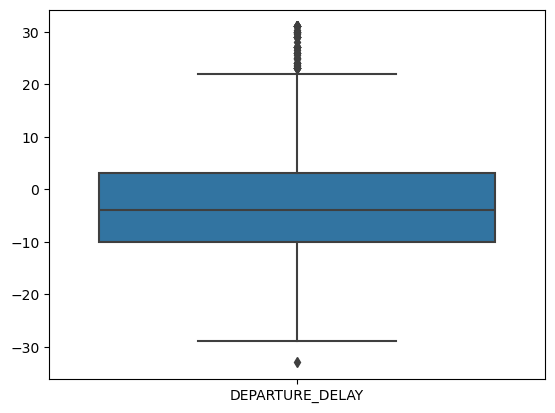

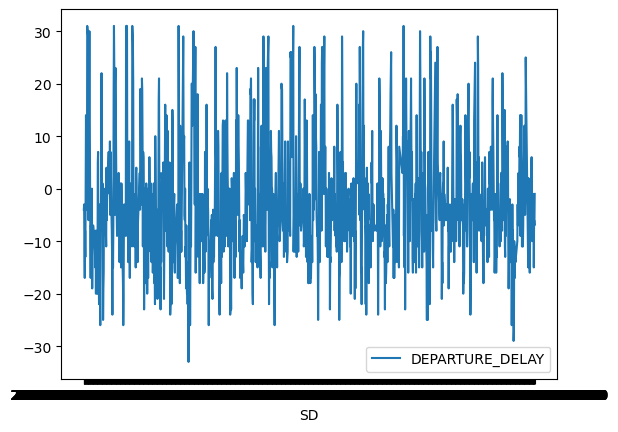

In [ ]:
sns.boxplot(y)
plt.show()
sns.lineplot(y)
plt.show()

In [ ]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
# Box-Cox变换
y_min = np.min(y)-0.1
y_box, lmbda= boxcox(y.values.ravel()-y_min)  

In [ ]:
# 定义SARIMA模型的超参数范围
p = range(0, 3)  # 自回归阶数范围
d = range(0, 2)  # 差分阶数范围
q = range(0, 3)  # 移动平均阶数范围

pdq = list(itertools.product(p, d, q))

# 定义季节部分的超参数范围
seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]

# 网格搜索SARIMA模型的最佳超参数
best_aic = np.inf
best_order = None
best_seasonal_order = None
for param in tqdm(pdq):
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(y_box, order=param, seasonal_order=param_seasonal)
            model_fit = model.fit(disp=False)
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = param
                best_seasonal_order = param_seasonal
        except:
            continue

# 使用最佳超参数构建SARIMA模型
print('最佳阶数为: 非季节部分 {}  季节部分 {}'.format(best_order, best_seasonal_order))
model = SARIMAX(y_box, order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit(disp=False)
model_fit.summary()

  0%|          | 0/18 [00:00<?, ?it/s]

最佳阶数为: 非季节部分 (1, 0, 0)  季节部分 (0, 1, 1, 5)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1452
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 5)   Log Likelihood               -2721.904
Date:                             Sun, 21 Apr 2024   AIC                           5449.807
Time:                                     11:43:05   BIC                           5465.639
Sample:                                          0   HQIC                          5455.716
                                            - 1452                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5751      0.019     30.079      0.000       0.538       0.613
ma.S.L5       -0.9585      0.008   -127.064      0.000      -0.973      -0.944
sigma2         2.4977      0.078     32.182      0.000       2.346       2.650
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                45.96
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 对新数据进行预测
n_forecast = len(y_test)
y_pred_box = model_fit.forecast(steps=n_forecast)

# 计算偏差调整因子
adjustment_factor = np.exp(np.sum(np.log(y - y_min)) / len(y))

array([8.59635338, 8.4427975 , 8.49790796, 8.36388055, 9.00885333,
       8.57801978, 8.43225432, 8.49184485, 8.3603938 , 9.0068482 ,
       8.57686668, 8.4315912 , 8.49146351, 8.3601745 , 9.00672208,
       8.57679416, 8.4315495 , 8.49143952, 8.36016071, 9.00671415,
       8.57678959, 8.43154687, 8.49143802, 8.36015984, 9.00671365,
       8.57678931, 8.43154671, 8.49143792, 8.36015979, 9.00671362,
       8.57678929, 8.4315467 , 8.49143791, 8.36015979, 9.00671362,
       8.57678929, 8.4315467 , 8.49143791, 8.36015979, 9.00671362,
       8.57678929, 8.4315467 , 8.49143791, 8.36015979, 9.00671362,
       8.57678929, 8.4315467 , 8.49143791, 8.36015979, 9.00671362,
       8.57678929, 8.4315467 , 8.49143791, 8.36015979, 9.00671362,
       8.57678929, 8.4315467 , 8.49143791, 8.36015979, 9.00671362,
       8.57678929, 8.4315467 , 8.49143791, 8.36015979, 9.00671362,
       8.57678929, 8.4315467 , 8.49143791, 8.36015979, 9.00671362,
       8.57678929, 8.4315467 , 8.49143791, 8.36015979, 9.00671

In [ ]:
# 对新数据进行预测
n_forecast = len(y_test)
y_pred_box = model_fit.forecast(steps=n_forecast)

# 计算偏差调整因子
adjustment_factor = np.exp(np.sum(np.log(y - y_min)) / len(y))
y_pred_adjusted = np.add(y_pred_box , adjustment_factor)

# 对预测值进行box-cox逆变换
y_pred = inv_boxcox(y_pred_adjusted, lmbda) + y_min

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# 计算RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

# 计算MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.3f}")

# 计算MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.3%}")

RMSE: 28.422
MAE: 15.025
MAPE: 50837421061022696.000%


In [ ]:
y_test

,DEPARTURE_DELAY
SD,
2015-10-18 15:23:00,-13.0
2015-10-18 16:30:00,-8.0
2015-10-18 17:46:00,-17.0
2015-10-19 11:33:00,-7.0
2015-10-19 13:55:00,-10.0
...,...
2015-12-31 11:05:00,-2.0
2015-12-31 13:44:00,-5.0
2015-12-31 15:20:00,-23.0
